In [2]:
import keras
from keras.datasets import cifar10
import warnings
warnings.filterwarnings("default", category=DeprecationWarning)

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.6/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


In [6]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'valid samples')

x_train shape: (40000, 32, 32, 3)
40000 train samples
10000 test samples
10000 valid samples


In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255
x_test /= 255
x_valid /= 255

###MODEL_1

In [8]:
model_1 = Sequential()
model_1.add(Conv2D(32, (5, 5),input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(64, (5, 5)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [9]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [10]:
print(model_1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [11]:
history = model_1.fit(x=x_train, y=y_train, batch_size=32, 
          epochs=10, verbose=1, validation_data=(x_valid , y_valid),
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/10





40000/40000 [==============================] - 23s 569us/step - loss: 1.5916 - acc: 0.4185 - val_loss: 1.4024 - val_acc: 0.5045
Epoch 2/10
40000/40000 [==============================] - 15s 363us/step - loss: 1.2780 - acc: 0.5422 - val_loss: 1.1845 - val_acc: 0.5913
Epoch 3/10
40000/40000 [==============================] - 14s 357us/step - loss: 1.1347 - acc: 0.6017 - val_loss: 1.1032 - val_acc: 0.6087
Epoch 4/10
40000/40000 [==============================] - 14s 360us/step - loss: 1.0413 - acc: 0.6363 - val_loss: 1.0990 - val_acc: 0.6131
Epoch 5/10
40000/40000 [==============================] - 15s 376us/step - loss: 0.9709 - acc: 0.6625 - val_loss: 1.0334 - val_acc: 0.6397
Epoch 6/10
40000/40000 [==============================] - 15s 375us/step - loss: 0.9033 - acc: 0.6865 - val_loss: 1.0389 - val_acc: 0.6368
Epoch 7/10
400

Text(0.5, 1.0, 'Accuracy Curves')

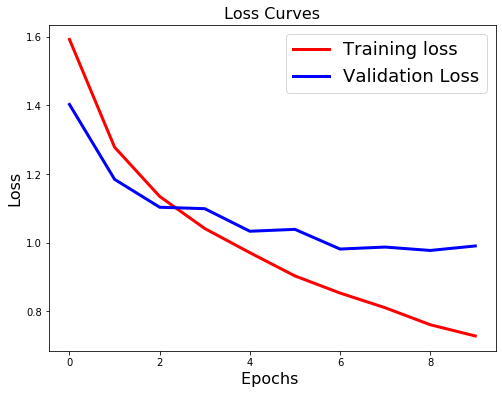

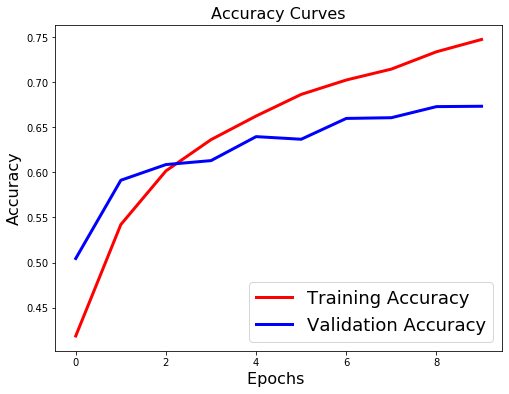

In [12]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [96]:
score, acc = model_1.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 1s 135us/step
Test loss: 1.0097705974578857
Test accuracy: 0.6588


##MODEL_2

In [0]:
model_2 = Sequential()
model_2.add(Conv2D(32, (5, 5),input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(3, 3)))
model_2.add(Conv2D(64, (5, 5)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(3, 3)))
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

In [18]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 64)          51264     
_________________________________________________________________
activation_10 (Activation)   (None, 5, 5, 64)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [19]:
history = model_2.fit(x=x_train, y=y_train, batch_size=32, 
          epochs=10, verbose=1, validation_data=(x_valid , y_valid),
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 15s 379us/step - loss: 1.7578 - acc: 0.3478 - val_loss: 1.5943 - val_acc: 0.4065
Epoch 2/10
40000/40000 [==============================] - 14s 340us/step - loss: 1.4646 - acc: 0.4697 - val_loss: 1.3844 - val_acc: 0.4958
Epoch 3/10
40000/40000 [==============================] - 14s 338us/step - loss: 1.3578 - acc: 0.5124 - val_loss: 1.3810 - val_acc: 0.5075
Epoch 4/10
40000/40000 [==============================] - 14s 350us/step - loss: 1.2815 - acc: 0.5459 - val_loss: 1.3151 - val_acc: 0.5355
Epoch 5/10
40000/40000 [==============================] - 14s 344us/step - loss: 1.2232 - acc: 0.5680 - val_loss: 1.2567 - val_acc: 0.5569
Epoch 6/10
40000/40000 [==============================] - 14s 347us/step - loss: 1.1734 - acc: 0.5880 - val_loss: 1.2330 - val_acc: 0.5682
Epoch 7/10
40000/40000 [==============================] - 14s 341us/step - loss: 1.1386 - acc: 0.6012 - val_loss: 1.

Text(0.5, 1.0, 'Accuracy Curves')

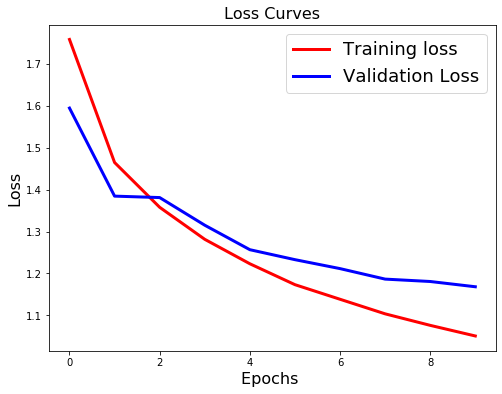

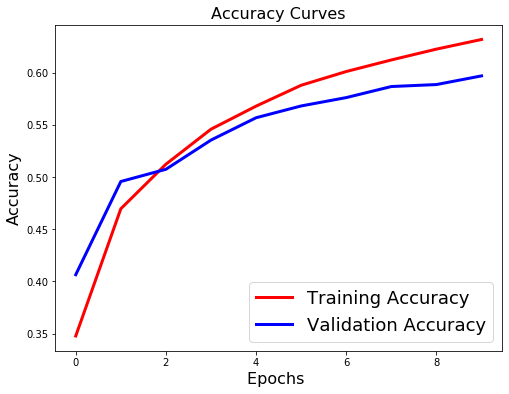

In [20]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [97]:
score, acc = model_2.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 1s 132us/step
Test loss: 1.1936870447158814
Test accuracy: 0.5858


##MODEL_3

In [0]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(64))
model_3.add(Activation('relu'))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

In [40]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_33 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_34 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2304)             

In [41]:
history = model_3.fit(x=x_train, y=y_train, batch_size=32, 
          epochs=10, verbose=1, validation_data=(x_valid , y_valid),
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 17s 414us/step - loss: 1.4871 - acc: 0.4662 - val_loss: 1.2229 - val_acc: 0.5648
Epoch 2/10
40000/40000 [==============================] - 14s 359us/step - loss: 1.1508 - acc: 0.5980 - val_loss: 1.0802 - val_acc: 0.6221
Epoch 3/10
40000/40000 [==============================] - 14s 361us/step - loss: 1.0100 - acc: 0.6464 - val_loss: 0.9992 - val_acc: 0.6519
Epoch 4/10
40000/40000 [==============================] - 14s 350us/step - loss: 0.9189 - acc: 0.6833 - val_loss: 0.9435 - val_acc: 0.6712
Epoch 5/10
40000/40000 [==============================] - 15s 374us/step - loss: 0.8473 - acc: 0.7031 - val_loss: 0.9570 - val_acc: 0.6705
Epoch 6/10
40000/40000 [==============================] - 15s 382us/step - loss: 0.7883 - acc: 0.7269 - val_loss: 0.9252 - val_acc: 0.6836
Epoch 7/10
40000/40000 [==============================] - 15s 376us/step - loss: 0.7385 - acc: 0.7436 - val_loss: 0.

Text(0.5, 1.0, 'Accuracy Curves')

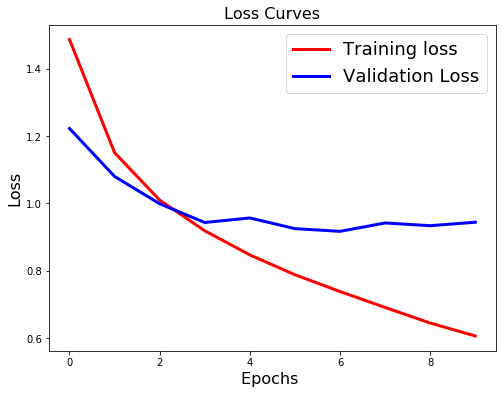

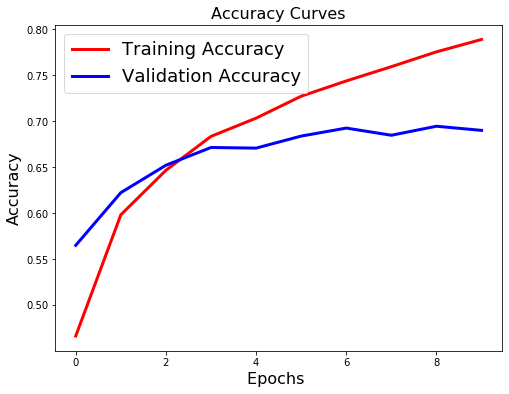

In [42]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [98]:
score, acc = model_3.evaluate(x_test,y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 1s 146us/step
Test loss: 0.9820696751594543
Test accuracy: 0.6884


##MODEL_4

In [0]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(128, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(Dense(64))
model_4.add(Activation('relu'))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))

In [45]:
model_4.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model_4.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_37 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_38 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 128)       

In [46]:
history = model_4.fit(x=x_train, y=y_train, batch_size=32, 
          epochs=10, verbose=1, validation_data=(x_valid , y_valid),
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 19s 467us/step - loss: 1.5791 - acc: 0.4189 - val_loss: 1.2979 - val_acc: 0.5361
Epoch 2/10
40000/40000 [==============================] - 18s 440us/step - loss: 1.2100 - acc: 0.5695 - val_loss: 1.1174 - val_acc: 0.6003
Epoch 3/10
40000/40000 [==============================] - 17s 422us/step - loss: 1.0413 - acc: 0.6339 - val_loss: 1.0350 - val_acc: 0.6399
Epoch 4/10
40000/40000 [==============================] - 17s 416us/step - loss: 0.9307 - acc: 0.6761 - val_loss: 0.9756 - val_acc: 0.6642
Epoch 5/10
40000/40000 [==============================] - 17s 419us/step - loss: 0.8493 - acc: 0.7055 - val_loss: 0.9512 - val_acc: 0.6708
Epoch 6/10
40000/40000 [==============================] - 16s 412us/step - loss: 0.7766 - acc: 0.7308 - val_loss: 0.9011 - val_acc: 0.6939
Epoch 7/10
40000/40000 [==============================] - 17s 414us/step - loss: 0.7166 - acc: 0.7510 - val_loss: 0.

Text(0.5, 1.0, 'Accuracy Curves')

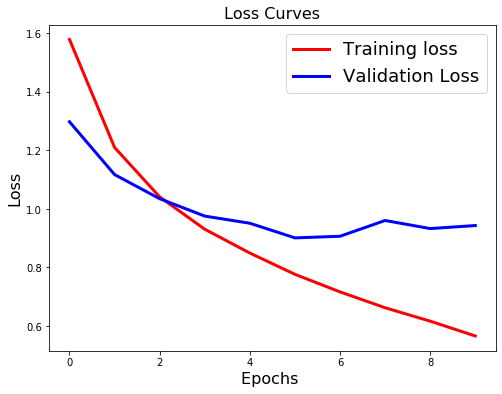

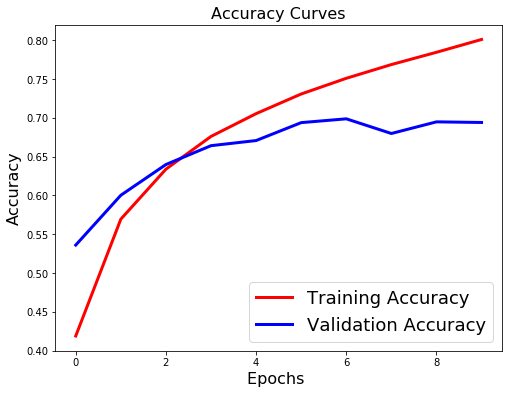

In [47]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [99]:
score, acc = model_4.evaluate(x_test,y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 2s 156us/step
Test loss: 0.9347462941169739
Test accuracy: 0.6915


## The best model is : model_4
###Because it has the greatest test accuracy of 0.6915 and validation accuracy of 0.6941
So going with model_4

In [55]:
model_5 = Sequential()
model_5.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:] , strides = 2))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_5.add(Conv2D(64, (3, 3), strides = 2))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model_5.add(Conv2D(128, (3, 3), strides = 2))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model_5.add(Flatten())
model_5.add(Dense(64))
model_5.add(Activation('relu'))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))

ValueError: ignored

In [0]:
###Negative dimension, so moving with model_3

In [0]:
model_5 = Sequential()
model_5.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:],strides = 2))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_5.add(Conv2D(64, (3, 3),strides = 2))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_5.add(Flatten())
model_5.add(Dense(64))
model_5.add(Activation('relu'))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))

In [57]:
model_5.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model_5.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
activation_48 (Activation)   (None, 15, 15, 32)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
activation_49 (Activation)   (None, 3, 3, 64)          0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)              

In [58]:
history = model_5.fit(x=x_train, y=y_train, batch_size=32, 
          epochs=10, verbose=1, validation_data=(x_valid , y_valid),
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 15s 364us/step - loss: 1.9205 - acc: 0.2866 - val_loss: 1.7273 - val_acc: 0.3539
Epoch 2/10
40000/40000 [==============================] - 13s 316us/step - loss: 1.6593 - acc: 0.3958 - val_loss: 1.5947 - val_acc: 0.4199
Epoch 3/10
40000/40000 [==============================] - 13s 316us/step - loss: 1.5555 - acc: 0.4390 - val_loss: 1.5692 - val_acc: 0.4320
Epoch 4/10
40000/40000 [==============================] - 13s 314us/step - loss: 1.4926 - acc: 0.4660 - val_loss: 1.5074 - val_acc: 0.4634
Epoch 5/10
40000/40000 [==============================] - 13s 325us/step - loss: 1.4411 - acc: 0.4867 - val_loss: 1.5017 - val_acc: 0.4606
Epoch 6/10
40000/40000 [==============================] - 13s 316us/step - loss: 1.4040 - acc: 0.4984 - val_loss: 1.4457 - val_acc: 0.4800
Epoch 7/10
40000/40000 [==============================] - 13s 319us/step - loss: 1.3715 - acc: 0.5101 - val_loss: 1.

Text(0.5, 1.0, 'Accuracy Curves')

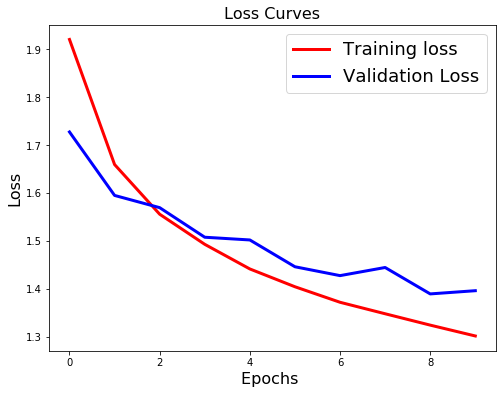

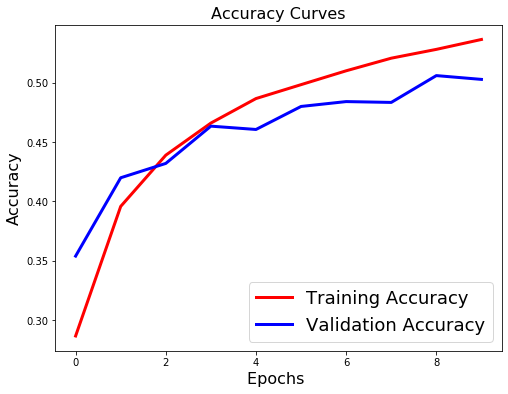

In [59]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [100]:
score, acc = model_5.evaluate(x_test,y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 1s 120us/step
Test loss: 1.4055956283569335
Test accuracy: 0.5008


In [0]:
model_6 = Sequential()
model_6.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:] , padding='same'))
model_6.add(Activation('relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_6.add(Conv2D(64, (3, 3), padding='same'))
model_6.add(Activation('relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_6.add(Conv2D(128, (3, 3), padding='same'))
model_6.add(Activation('relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_6.add(Flatten())
model_6.add(Dense(64))
model_6.add(Activation('relu'))
model_6.add(Dense(10))
model_6.add(Activation('softmax'))

In [62]:
model_6.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model_6.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_52 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_53 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 128)       

In [63]:
history = model_6.fit(x=x_train, y=y_train, batch_size=32, 
          epochs=10, verbose=1, validation_data=(x_valid , y_valid),
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 20s 503us/step - loss: 1.4528 - acc: 0.4723 - val_loss: 1.2766 - val_acc: 0.5487
Epoch 2/10
40000/40000 [==============================] - 18s 441us/step - loss: 1.0158 - acc: 0.6472 - val_loss: 0.9781 - val_acc: 0.6558
Epoch 3/10
40000/40000 [==============================] - 18s 445us/step - loss: 0.8488 - acc: 0.7054 - val_loss: 0.8928 - val_acc: 0.6913
Epoch 4/10
40000/40000 [==============================] - 18s 440us/step - loss: 0.7409 - acc: 0.7417 - val_loss: 0.8654 - val_acc: 0.7074
Epoch 5/10
40000/40000 [==============================] - 18s 441us/step - loss: 0.6550 - acc: 0.7713 - val_loss: 0.7980 - val_acc: 0.7294
Epoch 6/10
40000/40000 [==============================] - 18s 446us/step - loss: 0.5720 - acc: 0.7989 - val_loss: 0.8137 - val_acc: 0.7320
Epoch 7/10
40000/40000 [==============================] - 17s 437us/step - loss: 0.5102 - acc: 0.8211 - val_loss: 0.

Text(0.5, 1.0, 'Accuracy Curves')

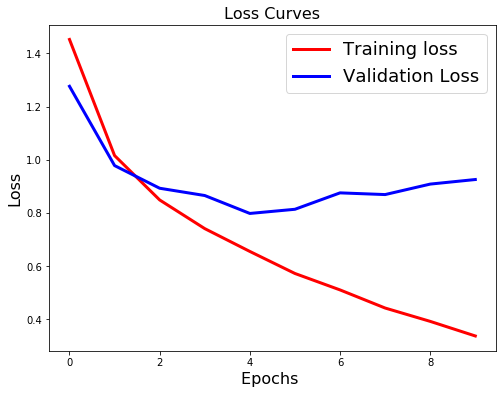

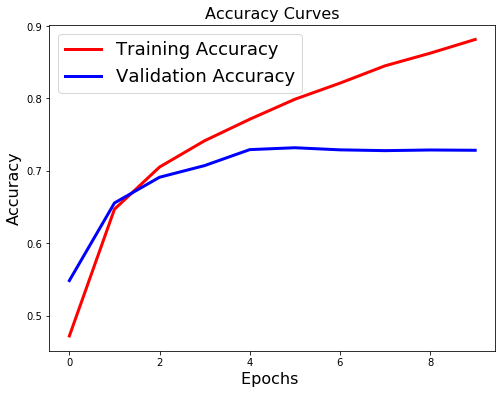

In [64]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [101]:
score, acc = model_6.evaluate(x_test,y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 2s 154us/step
Test loss: 0.9571383144378662
Test accuracy: 0.7191


In [0]:
model_7 = Sequential()
model_7.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:],strides = 2 , padding='same'))
model_7.add(Activation('relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2),strides = 2, padding='same'))
model_7.add(Conv2D(64, (3, 3),strides = 2, padding='same'))
model_7.add(Activation('relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2),strides = 2, padding='same'))
model_7.add(Conv2D(128, (3, 3),strides = 2, padding='same'))
model_7.add(Activation('relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2),strides = 2, padding='same'))
model_7.add(Flatten())
model_7.add(Dense(64))
model_7.add(Activation('relu'))
model_7.add(Dense(10))
model_7.add(Activation('softmax'))

In [90]:
model_7.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model_7.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
activation_78 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
activation_79 (Activation)   (None, 4, 4, 64)          0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 1, 1, 128)       

In [91]:
history = model_7.fit(x=x_train, y=y_train, batch_size=32, 
          epochs=10, verbose=1, validation_data=(x_valid , y_valid),
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 17s 424us/step - loss: 1.6768 - acc: 0.3799 - val_loss: 1.4218 - val_acc: 0.4775
Epoch 2/10
40000/40000 [==============================] - 14s 359us/step - loss: 1.3554 - acc: 0.5024 - val_loss: 1.2658 - val_acc: 0.5418
Epoch 3/10
40000/40000 [==============================] - 15s 377us/step - loss: 1.2227 - acc: 0.5584 - val_loss: 1.1966 - val_acc: 0.5678
Epoch 4/10
40000/40000 [==============================] - 15s 371us/step - loss: 1.1387 - acc: 0.5895 - val_loss: 1.1771 - val_acc: 0.5772
Epoch 5/10
40000/40000 [==============================] - 14s 358us/step - loss: 1.0723 - acc: 0.6149 - val_loss: 1.1302 - val_acc: 0.6003
Epoch 6/10
40000/40000 [==============================] - 15s 366us/step - loss: 1.0264 - acc: 0.6306 - val_loss: 1.1145 - val_acc: 0.6062
Epoch 7/10
40000/40000 [==============================] - 15s 370us/step - loss: 0.9783 - acc: 0.6502 - val_loss: 1.

Text(0.5, 1.0, 'Accuracy Curves')

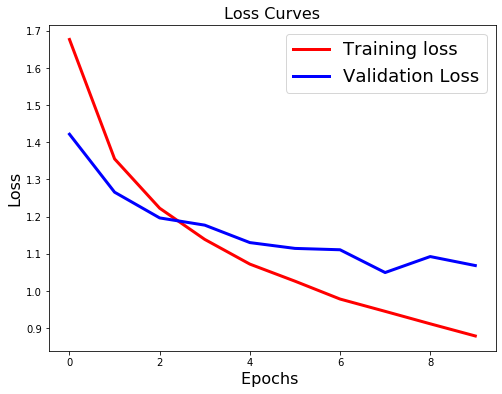

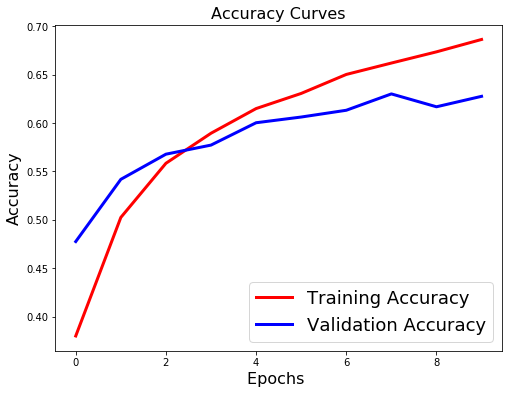

In [92]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [102]:
score, acc = model_7.evaluate(x_test,y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 1s 126us/step
Test loss: 1.0669710666656493
Test accuracy: 0.6291


## The best model is : model_6
###Because it has the greatest test accuracy of 0.7191 and validation accuracy of 0.7285
So going with model_6

In [0]:
model_8 = Sequential()
model_8.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:] , padding='same'))
model_8.add(Activation('tanh'))
model_8.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_8.add(Conv2D(64, (3, 3), padding='same'))
model_8.add(Activation('tanh'))
model_8.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_8.add(Conv2D(128, (3, 3), padding='same'))
model_8.add(Activation('tanh'))
model_8.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_8.add(Flatten())
model_8.add(Dense(64))
model_8.add(Activation('tanh'))
model_8.add(Dense(10))
model_8.add(Activation('softmax'))

In [79]:
model_8.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model_8.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_68 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_69 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 8, 8, 128)       

In [80]:
history = model_8.fit(x=x_train, y=y_train, batch_size=32, 
          epochs=10, verbose=1, validation_data=(x_valid , y_valid),
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 21s 533us/step - loss: 1.3492 - acc: 0.5183 - val_loss: 1.1703 - val_acc: 0.5863
Epoch 2/10
40000/40000 [==============================] - 19s 483us/step - loss: 0.9785 - acc: 0.6599 - val_loss: 0.9978 - val_acc: 0.6591
Epoch 3/10
40000/40000 [==============================] - 19s 468us/step - loss: 0.8370 - acc: 0.7085 - val_loss: 0.9080 - val_acc: 0.6849
Epoch 4/10
40000/40000 [==============================] - 18s 457us/step - loss: 0.7224 - acc: 0.7492 - val_loss: 0.9416 - val_acc: 0.6816
Epoch 5/10
40000/40000 [==============================] - 18s 456us/step - loss: 0.6183 - acc: 0.7855 - val_loss: 0.9005 - val_acc: 0.6957
Epoch 6/10
40000/40000 [==============================] - 19s 466us/step - loss: 0.5290 - acc: 0.8181 - val_loss: 0.9340 - val_acc: 0.6952
Epoch 7/10
40000/40000 [==============================] - 18s 451us/step - loss: 0.4449 - acc: 0.8477 - val_loss: 0.

Text(0.5, 1.0, 'Accuracy Curves')

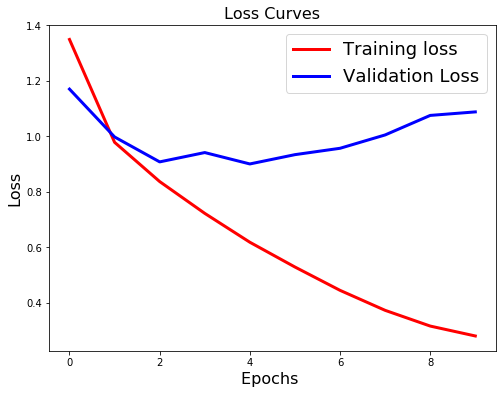

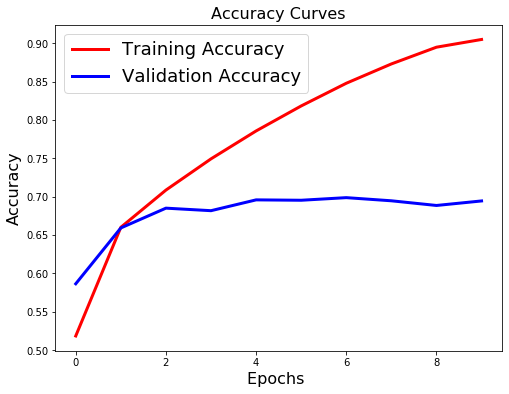

In [81]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [103]:
score, acc = model_8.evaluate(x_test,y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 2s 160us/step
Test loss: 1.1149108538627623
Test accuracy: 0.6912


In [0]:
model_9 = Sequential()
model_9.add(Conv2D(32, (3, 3),input_shape=x_train.shape[1:] , padding='same'))
model_9.add(Activation('sigmoid'))
model_9.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_9.add(Conv2D(64, (3, 3), padding='same'))
model_9.add(Activation('sigmoid'))
model_9.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_9.add(Conv2D(128, (3, 3), padding='same'))
model_9.add(Activation('sigmoid'))
model_9.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_9.add(Flatten())
model_9.add(Dense(64))
model_9.add(Activation('sigmoid'))
model_9.add(Dense(10))
model_9.add(Activation('softmax'))

In [84]:
model_9.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model_9.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_73 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_74 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 8, 8, 128)       

In [85]:
history = model_9.fit(x=x_train, y=y_train, batch_size=32, 
          epochs=10, verbose=1, validation_data=(x_valid , y_valid),
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 20s 508us/step - loss: 2.3095 - acc: 0.0970 - val_loss: 2.3052 - val_acc: 0.0973
Epoch 2/10
40000/40000 [==============================] - 18s 457us/step - loss: 2.0509 - acc: 0.2328 - val_loss: 1.7048 - val_acc: 0.3825
Epoch 3/10
40000/40000 [==============================] - 19s 464us/step - loss: 1.5730 - acc: 0.4294 - val_loss: 1.5087 - val_acc: 0.4579
Epoch 4/10
40000/40000 [==============================] - 18s 458us/step - loss: 1.4237 - acc: 0.4870 - val_loss: 1.4370 - val_acc: 0.4749
Epoch 5/10
40000/40000 [==============================] - 18s 458us/step - loss: 1.3391 - acc: 0.5193 - val_loss: 1.3443 - val_acc: 0.5170
Epoch 6/10
40000/40000 [==============================] - 18s 458us/step - loss: 1.2716 - acc: 0.5452 - val_loss: 1.2866 - val_acc: 0.5349
Epoch 7/10
40000/40000 [==============================] - 18s 461us/step - loss: 1.2106 - acc: 0.5683 - val_loss: 1.

Text(0.5, 1.0, 'Accuracy Curves')

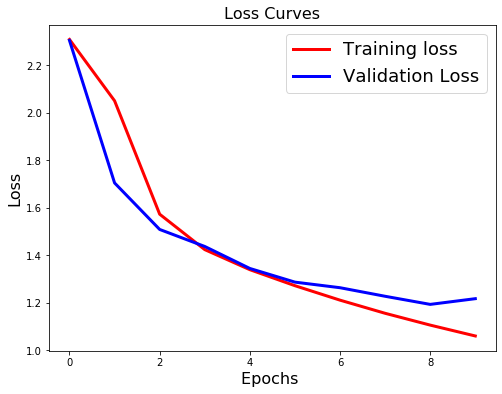

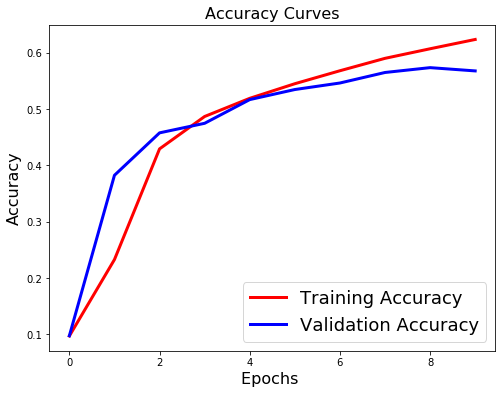

In [86]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [95]:
score, acc = model_9.evaluate(x_test,y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 2s 165us/step
Test loss: 1.2111192123413086
Test accuracy: 0.5662


[Click here to get the table](https://docs.google.com/document/d/1LPv3seLYaOHTV-hhDqdVisuFHwOXYWsaCR1ysFDkXrc/edit?usp=sharing)